In [4]:
import matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os
from scipy.signal import savgol_filter, periodogram, resample, csd
from scipy.fftpack import ifft, fftshift
from scipy.stats import norm
from scipy.linalg import eigh, cholesky

pylab.rcParams['figure.figsize'] = 16, 12

## Set directories for convenience
main_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18'
data_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Data'
results_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Results'

In [5]:
## Get desired datasets using a list comprehension
all_subdirectories = os.listdir(results_directory)

subdirectories = [subdirectory for subdirectory in all_subdirectories if ("poldm" in subdirectory)
                  if ("GPI" in subdirectory)]

## Get the filepaths to the coefficients csv files
zernike_coefficient_datapaths = [os.path.join(results_directory, subdirectory, '{}_coefficients.csv'.format(subdirectory))
                                 for subdirectory in subdirectories]

datafile = []
Z_coefficients_all = []

## Read each csv file and make a list of the resulting NumPy arrays
for datapath in zernike_coefficient_datapaths:
    
    try:
        datafile.append(datapath)
        coefficients = np.loadtxt(datapath, dtype=np.float64, delimiter=',')
        Z_coefficients_all.append(coefficients)
    except IOError:
        pass

Z_coefficients = Z_coefficients_all[0]

In [3]:
F, Z5_PSD = periodogram(Z_coefficients[4], fs=1000.0, return_onesided=False)
Z5_PSD_pos = Z5_PSD[1:29950]
F_pos = Z_frequencies[1:29950]

smooth_Z5_PSD_pos = 10**savgol_filter(np.log10(Z5_PSD_pos), 101, 5)

par = np.polyfit(np.log10(F_pos[F_pos>=1.]), np.log10(smooth_Z5_PSD_pos[F_pos>=1.]), 1)
slope = par[0]
intercept = par[1]

f_array = np.logspace(0, np.log10(500), 1000)

plt.semilogy(F_pos, smooth_Z5_PSD_pos, 'b',
           f_array, 10**intercept*f_array**slope, 'r',
           np.median(f_array), 10**intercept*np.median(f_array)**slope, 'go')
plt.grid(b=True, which='both')
#plt.scatter(np.log(f_mean), np.log(Z_mean))

print slope, intercept

NameError: name 'Z_frequencies' is not defined

In [ ]:
def gen_zernike_series(PSD, scale_factor=42.1, rvs=None):
    
    N = PSD.shape[0]
    
    A = np.sqrt(PSD)
    
    if rvs is None:
        rand = np.random.normal(size=N)
    else:
        rand = rvs
    frand = np.fft.fft(rand)
    
    inverse = np.fft.ifft(frand*A)
    
    return scale_factor*inverse

In [ ]:
gen_Z5 = gen_zernike_series(Z5_PSD).real
#plt.plot(test)

In [ ]:
gen_F, gen_Z5_PSD = periodogram(gen_Z5, fs=1000.0, return_onesided=False)
gen_Z5_PSD_pos = gen_Z5_PSD[1:29950]
gen_F_pos = gen_F[1:29950]

smooth_gen_Z5_PSD_pos = 10**savgol_filter(np.log10(gen_Z5_PSD_pos), 101, 5)

gen_par = np.polyfit(np.log10(gen_F_pos[gen_F_pos>=1.]), np.log10(smooth_gen_Z5_PSD_pos[gen_F_pos>=1.]), 1)
gen_slope = gen_par[0]
gen_intercept = gen_par[1]

print gen_slope, gen_intercept

In [ ]:
plt.loglog(gen_F_pos, smooth_gen_Z5_PSD_pos, 'b',
           F_pos, smooth_Z5_PSD_pos, 'r')

## Generate Atmosphere

In [ ]:
#for i in range(Z_coefficients.shape[0]):

#    ## Create smoothed PSD
#    F, Z_PSD = periodogram(Z_coefficients[i], fs=1000.0, return_onesided=False)
#    Z_PSD_pos = Z_PSD[1:29950]
#    F_pos = Z_frequencies[1:29950]
#
#    smooth_Z_PSD_pos = 10**savgol_filter(np.log10(Z_PSD_pos), 101, 5)
#
#    par = np.polyfit(np.log10(F_pos[F_pos>=1.]), np.log10(smooth_Z_PSD_pos[F_pos>=1.]), 1)
#    slope = par[0]
#    intercept = par[1]
#    
#    gen_Z = gen_zernike_series(Z_PSD).real
#
#    gen_F, gen_Z_PSD = periodogram(gen_Z, fs=1000.0, return_onesided=False)
#    gen_Z_PSD_pos = gen_Z_PSD[1:29950]
#    gen_F_pos = gen_F[1:29950]
#
#    smooth_gen_Z_PSD_pos = 10**savgol_filter(np.log10(gen_Z_PSD_pos), 101, 5)
#
#    gen_par = np.polyfit(np.log10(gen_F_pos[gen_F_pos>=1.]), np.log10(smooth_gen_Z_PSD_pos[gen_F_pos>=1.]), 1)
#    gen_slope = gen_par[0]
#    gen_intercept = gen_par[1]
#    
#    slope_diff.append(slope-gen_slope)
#    intercept_diff.append(intercept-gen_intercept)

In [ ]:
## Generate correlated continuous variables for each zernike
corr_matrix = np.corrcoef(Z_coefficients)

num_samples = Z_coefficients[0].shape[0]
x = norm.rvs(size=(37, num_samples))
c = cholesky(corr_matrix, lower=True)
y = np.dot(c, x)

In [ ]:
gen_Z_coefficients = []

for i in range(Z_coefficients.shape[0]):
    
    F, Z_PSD = periodogram(Z_coefficients[i], fs=1000.0, return_onesided=False)
    gen_Z = gen_zernike_series(Z_PSD, rvs=y[0]).real
    
    gen_Z_coefficients.append(gen_Z)
    
gen_Z_coefficients = np.asarray(gen_Z_coefficients)

In [ ]:
test_corr = np.corrcoef(gen_Z_coefficients)
plt.imshow(test_corr)

In [ ]:
plt.imshow(corr_matrix)

In [11]:
csd_F, CSD = csd(Z_coefficients[3], Z_coefficients[10], 1000.)

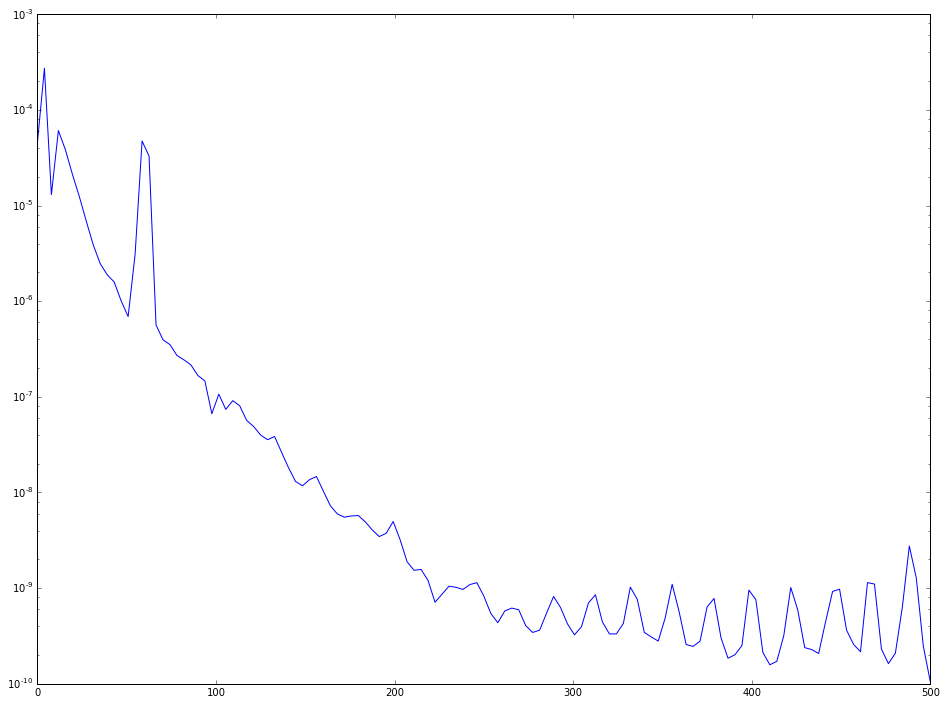

In [12]:
plt.semilogy(csd_F, np.abs(CSD))